<a href="https://colab.research.google.com/github/jasonjstewart/college-football/blob/master/Modeling_College_Football_FG_LogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#DATA CLEANING
## Data Imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import math

## Visualization imports
from matplotlib import pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## Machine Learning Imports
import sklearn.metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

## For evaluating our Log Reg result
from sklearn import metrics

df=pd.read_csv('https://jasonstewart.s3.amazonaws.com/LogReg+Final+CSV.csv')
# points_scored=[]
# for row in df['success_or_failure']:
#   if row==0:
#     points_scored.append(0)
#   else:
#     points_scored.append(3)
# df['points_scored']=points_scored
# df

# scoring=[]
# for row in df['scoring']:
#   if row==False:
#     scoring.append(0)
#   else:
#     scoring.append(1)
# df['scoring']=scoring
# df.describe()

# cf=[]
# for row in df['conference_game']:
#   if row==False:
#     cf.append(0)
#   else:
#     cf.append(1)
# df['conference_game']=cf
# df
# ns=[]
# for row in df['neutral_site']:
#   if row==False:
#     ns.append(0)
#   else:
#     ns.append(1)
# df['neutral_site']=ns

# df.drop(['next_drive_start_yardline',	'next_drive_start_yards_to_goal',	'next_drive_end_period',	'next_drive_end_yardline',	'next_drive_end_yards_to_goal',	'next_drive_plays',	'next_drive_yards',	'points_scored',	'next_drive_points_scored','Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','offense','id','defense','drive_result','defense_conference','attendance','offense_conference','next_drive_defense_conference','next_drive_scoring','next_drive_start_period','next_drive_offense','next_drive_defense','next_drive_offense_conference','drive_id','next_drive_id','next_drive_game_id','next_drive_start_time','next_drive_yard_line','next_drive_yards_to_goal','next_drive_end_time','next_drive_elapsed','next_drive_drive_result'], axis=1, inplace=True)
# df.drop(['play_type','down','start_period','start_yardline','start_yards_to_goal',	'start_time',	'end_period',	'end_yardline',	'end_yards_to_goal',	'end_time',	'elapsed', 'away_id', 'excitement_index', 'game_id','home_post_win_prob', 'conference_game', 'neutral_site', 'season_type', 'away_post_win_prob', 'scoring'], axis=1, inplace=True)
# df.dropna(axis=1)

df.head(3)

,Unnamed: 0,home,offense_score,defense_score,period,clock,yard_line,yards_to_goal,distance,yards_gained,ppa,plays,yards,season,week,success_or_failure
0,0,0,0,7,1,89,36,36,4,5,2.130077,12,64,2015,11,0
1,1,1,0,0,1,696,68,32,2,-10,-2.672218,6,19,2018,5,0
2,2,0,3,7,1,315,56,56,2,0,-0.589364,5,19,2015,6,0


In [ ]:
df.to_csv('LogReg Final CSV.csv')

In [ ]:
#FIX SKEWNESS, NEED TO ACCOUNT FOR NEGATIVE SKEWNESS
#MAY NEED TO LOOK AT https://app.myeducator.com/reader/web/1702a/p1/wb00d/ in the textbook, 
# not sure if you have access to this one or this one https://app.myeducator.com/reader/web/1702/p1/re4ji/
#Look into binning if needed, probably wont.


def fix_skew(df, feature):
  import numpy as np
  # check for positive skewness
  if df[feature].skew() > 1:
    # generate the new columns to test
    df[feature + '_SR'] = np.sqrt(df[feature])
    df[feature + '_CR'] = np.cbrt(df[feature])
    df[feature + '_LN'] = np.log(df[feature] + 1)
    # df[feature + '_BIN'] = bin_numeric(df[feature])[2]
    print(df.skew())
    
    # get dummies
    for col in df:
      if not pd.api.types.is_numeric_dtype(df[col]):
        df = df.join(pd.get_dummies(df[col], prefix=col, drop_first=True))

    # get numeric columns
    df = df.select_dtypes(np.number)
    df_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df), columns=df.columns)

    # test original feature
    y = df_minmax[feature]
    X = df_minmax.drop(columns=[feature, feature + '_LN', feature + '_SR', feature + '_CR']).assign(const=1)

    results = sm.OLS(y, X).fit()
    print(results.summary())

    # test square root feature
    y = df_minmax[feature + '_SR']
    X = df_minmax.drop(columns=[feature, feature + '_LN', feature + '_SR', feature + '_CR']).assign(const=1)

    results = sm.OLS(y, X).fit()
    print(results.summary())

    # test cube root feature
    y = df_minmax[feature + '_CR']
    X = df_minmax.drop(columns=[feature, feature + '_LN', feature + '_SR', feature + '_CR']).assign(const=1)

    results = sm.OLS(y, X).fit()
    print(results.summary())

    # test log feature
    y = df_minmax[feature + '_LN']
    X = df_minmax.drop(columns=[feature, feature + '_LN', feature + '_SR', feature + '_CR']).assign(const=1)

    results = sm.OLS(y, X).fit()
    print(results.summary())

    # test binning feature
    # y = df_minmax[feature + '_BIN']
    # X = df_minmax.drop(columns=[feature, feature + '_LN', feature + '_SR', feature + '_CR', feature + '_BIN']).assign(const=1)

    # results = sm.OLS(y, X).fit()
    # print(results.summary())


  elif df[feature].skew() < -1:
    # here we would fix negatively skewed variables if there were any in this dataset
    #$*$*$*$**$*$*$*$*$*$*$*$*$*$*$*$*$*$*$*$*$*$%^~!$@$$&^^%$@$!#@#&#$@!##$#*&#^@%%%#$!@$%$#&%^*@#$%!@#$%@#$^#$&#$@#$!#$@^#%&#$&*$%^*$%@#^$@#$%#$&$%*#$%#@&$^#$%&#%^*
    #need to account for negative skewness
    return
  else:
    # return if skewness is between -1 and 1; negligible
    return

In [ ]:
#CORRECT OUTLIERS, this first part checks to see if there are outliers
outliers = pd.DataFrame(columns=['min', 'count below', 'max', 'count above'])

# save the max to compare later
# peak_max = df[''].mean() + (df[''].std() * 3)

# Loop through each column in the dataframe except those that are: 1) categorical, 2) empty, or 3) binary (0/1)
for col in df:
  if pd.api.types.is_numeric_dtype(df[col]) and (len(df[col].value_counts()) > 0) and not all(df[col].value_counts().index.isin([0, 1])):
    # Calculate the theoretical min/max
    min = int(df[col].mean() - (df[col].std() * 3))
    max = int(df[col].mean() + (df[col].std() * 3))
    outliers.loc[col] = (min, df[col][df[col] < min].count(), max, df[col][df[col] > max].count())

outliers

#Goes through each column in DF to replace outliers with min or max
def manage_outliers(df):
  for col in df:
    if pd.api.types.is_numeric_dtype(df[col]) and (len(df[col].value_counts()) > 0) and not all(df[col].value_counts().index.isin([0, 1])):
      min = df[col].mean() - (df[col].std() * 3)
      max = df[col].mean() + (df[col].std() * 3)

      # Once the min/max is calculated for a column, take an inner loop through the row values of each column to replace values
      for i, value in enumerate(df[col]): 
        if value < min:      
          df.at[i, col + '_3std'] = min  # replace with min
          df.at[i, 'outlier'] = 1         # identify the record as an outlier for future filtering
        elif value > max:    
          df.at[i, col + '_3std'] = max   # replace with max
          df.at[i, 'outlier'] = 1
        else:                
          df.at[i, col + '_3std'] = value # use original value
          df.at[i, 'outlier'] = 0
    
  # I don't like binary variables like "outlier" becoming floats; cast it back to an int
  # if 'outlier' in df.columns:
  #   df = df.astype({"outlier": int})

  # View the cleaned dataset:
  print(df.head())

In [ ]:
#There shouldnt be any missing data, like I am 99% sure there isnt missing data but could be good to double check

#THIS BELOW COMES STRAIGHT FROM THE BOOK BUT IT SHOULD WORK
def manage_missing_data(df):
      import pandas as pd
      from scipy import stats

      for col_y in df:                                        # for each column in df to fill
        if df[col_y].isnull().sum() > 0:                      # if there is missing data to fill
          if is_numeric(df[col_y]):                           # and if that column is numeric
            r_list = df.corr()[col_y].abs()                   # create a correlation matrix for just the col_y feature; get absolute values to eliminate sign (+/-)
            r_list.sort_values(inplace=True, ascending=False) # sort the list descending (we want the second item in the list because the first is itself where r = 1.0)

            col_x = r_list.index[1] # Store the index name of the highest correlation

            # Create a new df with missing values of y and x dropped
            clean_df = df.copy()
            clean_df.dropna(subset=[col_y, col_x], inplace=True)

            # Calculate the regression line: y = m(x) + b
            m, b, r, p, err = stats.linregress(clean_df[col_x], clean_df[col_y])

            # enumerate() allows us to include a count-based index (i) along with the value
            for i, value in enumerate(df[col_y].values):
              if not pd.notnull(value):
                imputed_value = round((m * df[col_x][i]) + b, 1)

                # if the prediction is outside the range of actual values, then replace it with the min/max
                if imputed_value < df[col_y].min():
                  df[col_y][i] = df[col_y].min()
                elif imputed_value > df[col_y].max():
                  df[col_y][i] = df[col_y].max()
                else:
                  df[col_y][i] = imputed_value
      return df

In [ ]:
# #imput value for attendance that is 0 not null
# import pandas as pd
# from scipy import stats

# # for each column in df to fill
# # if there is missing data to fill
# # and if that column is numeric
# r_list = df.corr()['attendance'].abs()                   # create a correlation matrix for just the col_y feature; get absolute values to eliminate sign (+/-)
# r_list.sort_values(inplace=True, ascending=False) # sort the list descending (we want the second item in the list because the first is itself where r = 1.0)

# col_x = r_list.index[1] # Store the index name of the highest correlation

# # Create a new df with missing values of y and x dropped
# clean_df = df.copy()
# clean_df.dropna(subset=['attendance', col_x], inplace=True)

# # Calculate the regression line: y = m(x) + b
# m, b, r, p, err = stats.linregress(clean_df[col_x], clean_df['attendance'])

# # enumerate() allows us to include a count-based index (i) along with the value
# for i, value in enumerate(df['attendance'].values):
#   imputed_value = round((m * df[col_x][i]) + b, 1)

#   # if the prediction is outside the range of actual values, then replace it with the min/max
#   # if imputed_value < df['attendance'].min():
#   #   df['attendance'][i] = df['attendance'].min()
#   if df['attendance'][i]==0:
#     df['attendance'][i] = imputed_value
#   elif imputed_value < df['attendance'].min():
#     df['attendance'][i] = df['attendance'].min()
#   elif imputed_value > df['attendance'].max():
#     df['attendance'][i] = df['attendance'].max()
#   else:
#     df['attendance'][i] = imputed_value

# df.head(25)

In [ ]:
# def data_cleaning(df):
#   manage_missing_data(df)
#   manage_outliers(df)
#   for col in df:
#     fix_skew(df, col)
# # df.to_csv('college-football-data-p5-4th-down.csv') #change the name and it will output
# data_cleaning(df)
# df.head(3)

   Unnamed: 0  home  offense_score  ...  yards_3std  season_3std  week_3std
0           0     0              0  ...        64.0       2015.0       11.0
1           1     1              0  ...        19.0       2018.0        5.0
2           2     0              3  ...        19.0       2015.0        6.0
3           3     1             14  ...        25.0       2014.0        4.0
4           4     1              0  ...        74.0       2014.0        4.0

[5 rows x 31 columns]
Unnamed: 0            0.000000
home                 -0.259158
offense_score         1.050551
defense_score         0.607788
period               -0.485519
clock                 0.259325
yard_line            -0.082750
yards_to_goal         0.362209
distance              1.953465
yards_gained          1.528253
ppa                  -0.022480
plays                 0.470479
yards                -0.251663
season                0.016809
week                 -0.044381
success_or_failure    0.466151
Unnamed: 0_3std       0.0

NameError: ignored

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
# df=pd.read_csv('https://jasonstewart.s3.amazonaws.com/college-football-data-p5-4th-down-final.csv')
#df=pd.read_csv('https://jasonstewart.s3.amazonaws.com/college-football-data-fg-p5_final.csv')
df = df.dropna(how='any',axis=0) 

pd.isnull(df).sum()

Unnamed: 0            0
home                  0
offense_score         0
defense_score         0
period                0
clock                 0
yard_line             0
yards_to_goal         0
distance              0
yards_gained          0
ppa                   0
plays                 0
yards                 0
season                0
week                  0
success_or_failure    0
dtype: int64

In [ ]:
df.to_csv('LogReg Final CSV.csv')

In [ ]:


import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

label = "success_or_failure"
X = df.drop(columns = ['success_or_failure'])

y = df.success_or_failure

# Set label and features
log_model = LogisticRegression(C=1e5)

log_model.fit(X, y)

prediction = log_model.predict(X)
prediction

# View results
print(log_model.intercept_, log_model.coef_,)

[-0.00371907] [[ 2.52696301e+00 -1.02764007e-02  3.94859550e-01 -8.72104152e-01
  -2.64167110e-03 -1.58737936e-02 -4.69803018e-01 -4.34561515e-01
  -1.86484955e-01  7.41921482e-01  6.73949273e-01 -2.32726837e-01
   4.01337363e-01 -7.17352155e+00 -3.17361907e-01]]


In [ ]:
import sklearn.metrics
metrics.accuracy_score(y, prediction)
metrics.r2_score(y, prediction)

1.0

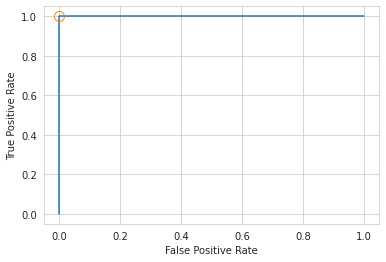

In [ ]:
# Produce ROC chart and AUC

from sklearn.metrics import roc_curve
falsepos,truepos,thresholds=roc_curve(y,log_model.decision_function(X))

plt.plot(falsepos,truepos,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff=np.argmin(np.abs(thresholds))
plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=10,label="cutoff",fillstyle="none")
plt.show()

In [ ]:
#Now, let’s compute our AUC value:
from sklearn import metrics
metrics.auc(falsepos, truepos)

1.0

In [ ]:
## Create a confusion matrix 
# Financial condition of banks: 1 = weak; 0 = strong
from sklearn.metrics import classification_report, confusion_matrix

pd.crosstab(y, prediction, rownames=['True'], colnames=['Predicted'], margins=True)

# Top is predicted, left is actual. So, Bottom right is True Positive, Bottom left is False Negative, Top right is False Positive, and top left is false negative


Predicted,0,1,All
True,,,
0,5744,0,5744
1,0,3619,3619
All,5744,3619,9363


In [ ]:
## Create a classification report (precision, recall, F-Score)

print(classification_report(y, prediction, labels=None, target_names=["Strong","Weak"], sample_weight=None, digits=2))

              precision    recall  f1-score   support

      Strong       0.86      0.87      0.87      5744
        Weak       0.79      0.77      0.78      3619

    accuracy                           0.83      9363
   macro avg       0.83      0.82      0.82      9363
weighted avg       0.83      0.83      0.83      9363

